Computational modeling in python, SoSe2022

Given are the following functions:

\begin{align}
    f_1(x) &= x\left(x-3\right)\left(x+3\right) \\
    f_2(x) &= \left| x \right| \\
    f_3(x) &= \sin \left(2.1x\right)\left(-\frac{x}{2}\right) \\
    f_4(x) &= 1.6^x -1.5x \\
    f_5(x,y) &= \sin\left(x+y\right)\tan\left(0.1x\right) \\
    f_6(x,y) &= \sin\left(\sqrt{5}+x\right)y 
\end{align}

\- courtesy of Anna Bardroff \- 

In [3]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm

def function1(x):
    y = x*(x - 3)*(x + 3)
    return y

def function2(x):
    y = abs(x)
    return y

def function3(x):
    y = sin(x * 2.1) * (-x / 2.0)
    return y

def function4(x):
    y = 1.6**x - 1.5 * x
    return y

def function5(x,y):
    z = sin(x + y) * tan(0.1 * x)
    return z

def function6(x,y):
    z = sin(sqrt(5) + x) * y
    return z

# Approaches to differentiate a function

## Numerically from the definition of the derivative

For numerical differentiation one can start with the definition of the derivative:

\begin{align}
f'(x) \approx \frac{f(x+h)-f(x)}{h}
\end{align}

with $h \rightarrow 0$. The function $f$ needs to be evaluated at points with distance $h$. $h$, of course, cannot be arbitrarily small and needs to be of some finite value. This method is therefore also called the __finite difference__ method. 



### The numpy diff function:

https://numpy.org/doc/stable/reference/generated/numpy.diff.html 

This function returns the difference between two consecutive elements of an array, as $f(x_{i+1})-f(x_i)$. Division by $dx$ will result in the above derivative. As diff() computes the differences, the returned array will have one fewer element than the original array for the first derivative. With diff also higher derivatives can be constructed (through recursive application of the difference) as shown below. 
<p>

### The numpy gradient function
    
https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
    
This function accepts an optional dx as an input (default: dx=1) and will compute the gradient using central differences 
    
\begin{align}
    f'(x) \approx \frac12 \left(\frac{f(x+h)-f(x)}{h} + \frac{f(x)-f(x-h)}{h}\right) = \frac{f(x+h)-f(x-h)}{2h}
\end{align}

for the interior points and one-side differences at the boundaries and will thus return an array of the same shape as the original array. Higher derivatives must be constructed by applying gradient repeatedly.

Limitations: round-off errors

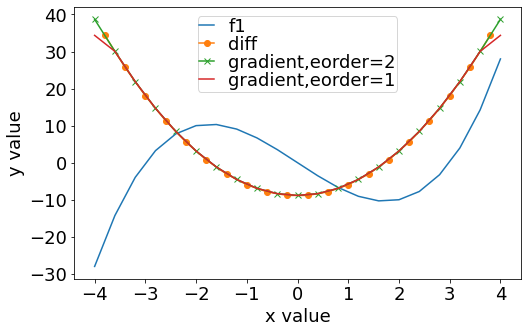

In [4]:
# evaluate in 21 points in interval [-4,4] 
a=-4
b=4
npoints = 21

num,dx = linspace(a, b, npoints, retstep=True)

f1 = function1(num)

dydx_diff = diff(f1)/dx
dydx_grad_e2 = gradient(f1, dx, edge_order=2)
dydx_grad_e1 = gradient(f1, dx, edge_order=1)

# put the diff points between original points
num2 = num + dx/2 

mf=18
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(num, f1, label='f1')
plt.plot(num2[0:-1], dydx_diff, label='diff', marker="o")
plt.plot(num, dydx_grad_e2, label='gradient,eorder=2', marker="x")
plt.plot(num, dydx_grad_e1, label='gradient,eorder=1')

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1,
                   labelspacing = 0, handlelength = 0.8)
plt.show()

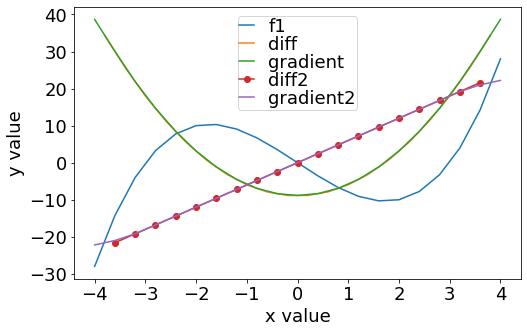

In [5]:
#second derivative
d2ydx2_diff = diff(f1,n=2)/dx**2
d2ydx2_grad = gradient(dydx_grad_e2, dx, edge_order=2) # original input from e2

# put the diff points again between original diff points
num3 = num2 + dx/2

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(num,f1,label='f1')

plt.plot(num2[0:-1],dydx_diff,label='diff')
plt.plot(num,dydx_grad_e2,label='gradient')

plt.plot(num3[0:-2],d2ydx2_diff,label='diff2', marker="o")
plt.plot(num,d2ydx2_grad,label='gradient2')

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)

legend = ax.legend(loc='best', shadow=False,fontsize=mf,
                   borderpad = 0.1, labelspacing = 0,
                   handlelength = 0.8)
plt.show()

## Using autograd

https://anaconda.org/conda-forge/autograd \
https://github.com/HIPS/autograd 

Open the anaconda terminal and type

`conda install autograd -c conda-forge`


What does it do? It relies on any complicated function being composed of simple continuous operations. The output of one operation is then interpreted as the input of the next operation.  Autograd tracks data through all simple operations using instrumented code ( similar to a debugger - this is why it needs its own numpy wrapper to be able to trace operations within numpy). From the record of operations it creates a call graph of simple operations. The derivative can then be evaluated with the chain rule.

- Limitations: need to be able to track execution or elementary functions must be implemented with derivatives. Cannot handle certain operations like in-place assignments (x += y)

----------------------

autograd cannot use inplace assignments, such as y+=x, but y=x+y is possible

In [6]:
from autograd.numpy import *  # this is a numpy wrapper 
from autograd import grad

dydx_autograd=[]

# the grad function instruments the function passed to it and returns a function 
# that calculates the derivative. 
grad_fct = grad(function1)
print(type(grad_fct))


<class 'function'>


In [7]:
# grad can only handle scalar inpit, so we need to call it element wise
for i1 in num:
    dydx_autograd.append(grad_fct(i1))

fnc = function1(num)

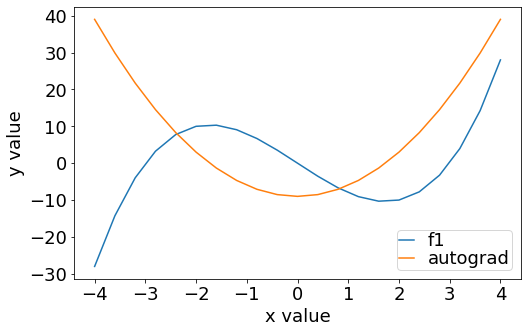

In [8]:
 
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(num,fnc,label='f1')
plt.plot(num,dydx_autograd,label='autograd')
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
legend = ax.legend(loc='lower right', shadow=False,fontsize=mf,
                   borderpad = 0.1, labelspacing = 0, handlelength = 0.8)
plt.show()

The function `elementwise_grad` expects arrays:

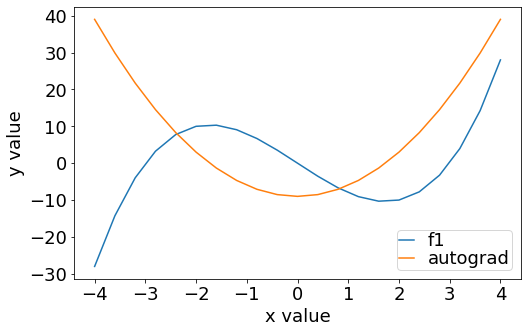

In [9]:
from autograd import elementwise_grad as egrad 

# create the function and directly call it with argument 'num'
dydx_autograd=egrad(function1)(num)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(num,f1,label='f1')
plt.plot(num,dydx_autograd,label='autograd')
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
legend = ax.legend(loc='lower right', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)
plt.show()

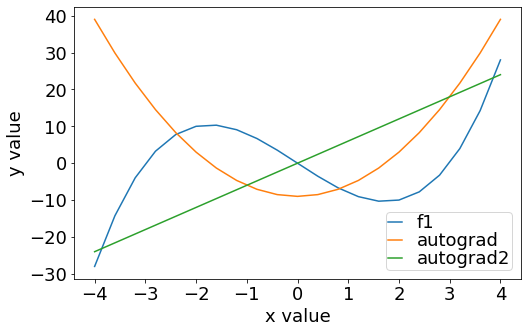

In [10]:
# Second derivative: just passt the derivative function again to autograd
dydx_autograd=egrad(function1)(num)
d2ydx2_autograd=egrad(egrad(function1))(num)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(num,f1,label='f1')
plt.plot(num,dydx_autograd,label='autograd')
plt.plot(num,d2ydx2_autograd,label='autograd2')
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
legend = ax.legend(loc='lower right', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)
plt.show()

Obviously a method of choice, especially for applications involving deep learning / neural networks where many derivatives are required (and is used in PyTorch, see for example - https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

## Symbolically using sympy

Sympy is a python library for symbolic manipulations: https://www.sympy.org/en/index.html. 

I want to mention it here for completeness, but generally we will not perform any symbolic computations. But if you need symbolic manipulations and do not want to buy a super expensive Mathematica license, maybe sympy is a way to go.

`conda install sympy`

- Limitation: may create huge expressions for complicated functions

Raw output:     x*(x - 3) + x*(x + 3) + (x - 3)*(x + 3)
After simplify: 3*x**2 - 9


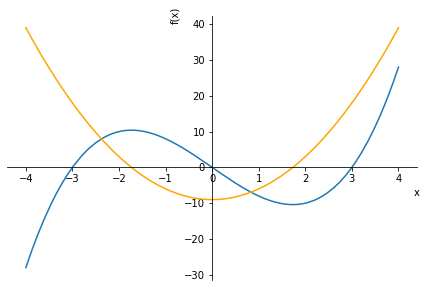

In [11]:
import sympy as sp

x= sp.Symbol('x')

function= x*(x-3)*(x+3)

dydx_sp=sp.diff(function, x)
print("Raw output:    ", dydx_sp)

dydx_sp = sp.simplify(dydx_sp)
print("After simplify:", dydx_sp)

#it comes with its own plotting routine
p1 = sp.plot(function,(x,-4,4),label='f1',show=False)
p2 = sp.plot(dydx_sp,(x,-4,4),label='sympy',show=False,line_color='orange')
p1.append(p2[0])
p1.show()

# Partial derivatives

The derivative of a function $f(x_1,x_2,\ldots,x_n)$ of more than one variable with respect to one of those variables is given by the partial derivative of the function, $\frac{\partial f}{\partial x_1} (x_1,x_2,\ldots,x_n)$.

The Jacobian matrix contains the first partial derivatives of a vectorized function $\mathbf{f} (x_1,x_2,\ldots,x_n)$,  $\mathbf{f}: \mathbb{R}^n \rightarrow \mathbb{R}^m$, wrt all the dimensions:
\begin{align}
\mathbf{J} = \left[ \frac{\partial \mathbf{f}}{\partial x_1}, \frac{\partial \mathbf{f}}{\partial x_2}, \ldots, \frac{\partial \mathbf{f}}{\partial x_n} \right] 
\end{align}

For example: 

\begin{align}
\mathbf{f} \left(
\begin{bmatrix}
x \\
y 
\end{bmatrix}
\right)=
\begin{bmatrix} f_1(x,y) \\
f_2(x,y) \end{bmatrix} = 
\begin{bmatrix} x^2+y  \\
y+2y^2+x \end{bmatrix} 
\end{align}
The Jacobian matrix of this function is
\begin{align}
\mathbf{J}(x,y) =
\begin{bmatrix} \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} \end{bmatrix} = 
\begin{bmatrix} 2x & 1  \\
1 & 4y + 1 \end{bmatrix} 
\end{align}
and the Jacobian determinant is 
\begin{align}
\det(\mathbf{J}(x,y))  =
(2x)\cdot (4y+1) - 1 \cdot 1 = 8xy + 2x - 2
\end{align}
The Jacobian matrix maps a set of vectors onto another set of vectors, for example, the transformation from cartesian $x, y$ to polar $r, \theta$ coordinates can be described through a Jacobian. __Because of this mapping, the Jacobian matrix is a tensor__. 

The Jacobian determinant is useful because it tells how the volume changes under the map.

__This is an example of matrix calculus, which is fundamental to applications in quantum chemistry and machine learning__.

Let's look at partial derivatives for an example function. We will use `autograd` for this.

In [12]:
#this is our sample function
def myfunc(x,y):
    z = x**2+y
    return z

#let's define a grid for evaluation and plotting so we can check the result
a=-4
b=4
npoints = 100
numx,deltax = linspace(a,b,npoints,retstep=True)
numy,deltay = linspace(a,b,npoints,retstep=True)

#this is the mesh for the plotting
partialx = zeros((len(numx),len(numy))) # df/dx
partialy = zeros((len(numx),len(numy))) # df/dy
fin = zeros((len(numx),len(numy))) # f

#derivative wrt first variable - x
px = grad(myfunc,0)
#derivative wrt second variable - y
py = grad(myfunc,1)

for j,x in enumerate(numx):
    for k,y in enumerate(numy):
        #value of the function at x,y
        fin[j,k]=myfunc(x,y)
        #value of partial derivative wrt x at x,y
        partialx[j,k]=px(x,y)
        #value of partial derivative wrt y at x,y
        partialy[j,k]=py(x,y)
            

def plot2D(x,y,z,title):
    mf = 16
    Y, X = meshgrid(y,x)
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, z,cmap = cm.viridis, rstride=1, cstride=1,edgecolor='none')
    plt.xticks(fontsize=mf)
    plt.yticks(fontsize=mf)
    ax.zaxis.set_tick_params(labelsize=mf)
    ax.set_xlabel('x value',fontsize=mf)
    ax.set_ylabel('y value',fontsize=mf)
    ax.set_zlabel('z value',fontsize=mf)
    ax.set_title('{}'.format(title),fontsize=mf, weight='bold')
    ax.view_init(30, 80)
    plt.show()
    

def plot_im(x,y,z,title):
    # x goes on the y axis
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.imshow(z,extent=[x[0],x[-1],y[0],y[-1]])
    ax.set_title('{}'.format(title),fontsize=mf, weight='bold')
    plt.show()

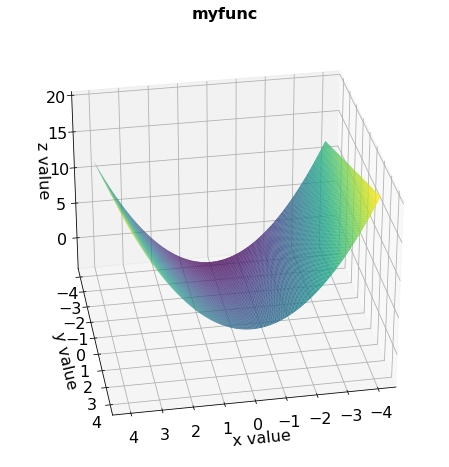

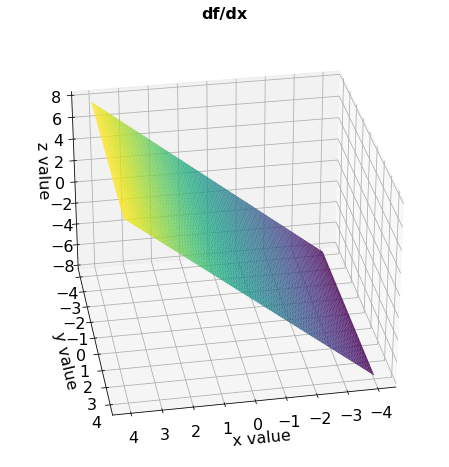

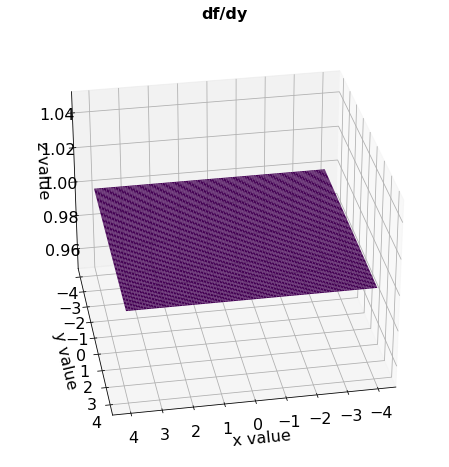

In [13]:
plot2D(numx,numy,fin,'myfunc')
plot2D(numx,numy,partialx,'df/dx')
plot2D(numx,numy,partialy,'df/dy')

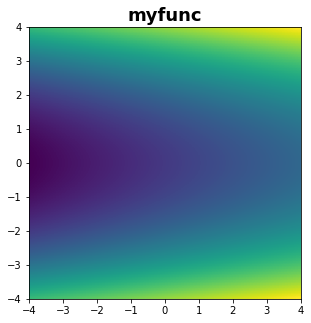

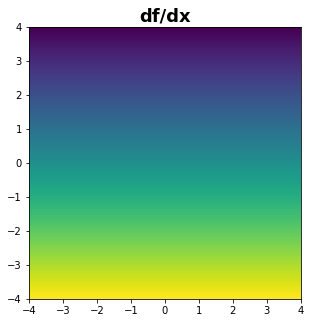

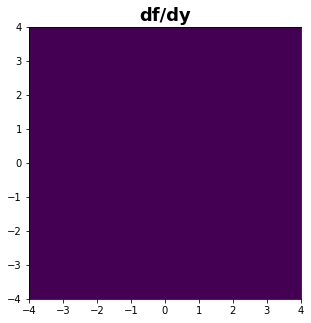

In [14]:
plot_im(numx,numy,fin,'myfunc')
plot_im(numx,numy,partialx,'df/dx')
plot_im(numx,numy,partialy,'df/dy')

# Second derivatives: The Laplacian

The Laplace operator generates the second derivatives of a multidimensional function, for example, in Hilbert space:

\begin{align}
\Delta f(x_1,x_2,\ldots,x_n) = 
\triangledown ^2  f(x_1,x_2,\ldots,x_n) 
= \sum_i^n \frac{\partial^2 f}{\partial x_i^2}
\end{align}
The Laplacian is extremely important in physics and appears for example in the Schrödinger equation. Using the three-point finite differences method we can find an expression for the second derivative:

\begin{align}
\frac{d^2 f}{dx^2} \approx \frac{f(x_{j-1})-2f(x_j)+f(x_{j+1})}{h^2}
\end{align}

Note that this expression has a very similar structure than in the interpolation problem. If $\vec{f} = \left\{f(x_j)\right\}$ is a vector of function values at the points $x_j$ we can express model the action of the Laplacian as a matrix $\mathcal{L}$ acting on a vector $\vec{f}$:

\begin{align}
\vec{f''} =  \mathcal{L} \vec{f}
\end{align}

with 

\begin{align}
\mathcal{L} = \frac{1}{h^2}\left[
\begin{array}{cccccc}
-2 & 1 & & & & \\
1 & -2 & 1 & & & \\
& \ddots & \ddots & \ddots & & \\
& & 1 & -2 & 1 & \\
& & & \ddots & \ddots & \ddots \\
& & & & 1 & -2 \\
\end{array} 
\right]
\end{align}



For a numerical representation of the Laplacian, the Laplacian matrix is introduced:
\begin{align}
\mathcal{L} = \mathbf{D}-\mathbf{A} 
\end{align}
where $\mathbf{D}$ is the degree matrix (a diagonal matrix containing the degree (=number of connections/neighbours) of each vertex $v_i$) and $\mathbf{A}$ is the adjacency matrix (which is 0 everywhere and 1 for adjacent vertices $v_i$ and $v_j$, that is vertices that are connected). As such, the Laplacian matrix contains the degree on the diagonal and ones on the off-diagonal for adjacent vertices.


The second derivative operator will appear on the diagonal on the Laplacian matrix and one on the off-diagonal for adjacent grid points.

Side-remark: The matrix vector multiplication will return wrong results for the end points. This one needs to keep in mind or fix, for instance by adding extra points to the left and right.  


In [15]:
a=-4
b=4
nsteps=9
myvals,h=linspace(a,b,nsteps,retstep=True)
Laplacian=(-2.0*diag(ones(nsteps))+diag(ones(nsteps-1),1)+diag(ones(nsteps-1),-1))/h**2
print('Laplacian:\n',Laplacian)
print('Diagonal matrix:\n',diag(ones(nsteps)))
print('-Adjacency matrix part 1:\n',diag(ones(nsteps-1),1))
print('-Adjacency matrix part 2:\n',diag(ones(nsteps-1),-1))

Laplacian:
 [[-2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.]]
Diagonal matrix:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
-Adjacency matrix part 1:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
-Adjacency matrix part 2:
 [[0. 0. 0. 0. 0. 0. 0.

Let's apply this to a sample function.

In [16]:
# some function
def myfunc2(x):
    y = 2*x**3
    return y

# exact derivative of the function
def d2myfunc2(x):
    y = 3*2*2*x**1
    return y

a=-1
b=1
nsteps=101

myvals,h=linspace(a,b,nsteps,retstep=True)
Laplacian=(-2.0*diag(ones(nsteps))+diag(ones(nsteps-1),1)+diag(ones(nsteps-1),-1))/(h**2)

inp = myfunc2(myvals)
outp = Laplacian @ inp # dot(Laplacian,inp)

print(outp)

#delete the endpoints, because we would need a special formula for them and do not want to bother at this point
outp = delete(outp,0)
outp = delete(outp,-1)

print(outp)

# compare with exact analytical derivative
d2exact = d2myfunc2(myvals)


[ 5.29404e+03 -1.17600e+01 -1.15200e+01 -1.12800e+01 -1.10400e+01
 -1.08000e+01 -1.05600e+01 -1.03200e+01 -1.00800e+01 -9.84000e+00
 -9.60000e+00 -9.36000e+00 -9.12000e+00 -8.88000e+00 -8.64000e+00
 -8.40000e+00 -8.16000e+00 -7.92000e+00 -7.68000e+00 -7.44000e+00
 -7.20000e+00 -6.96000e+00 -6.72000e+00 -6.48000e+00 -6.24000e+00
 -6.00000e+00 -5.76000e+00 -5.52000e+00 -5.28000e+00 -5.04000e+00
 -4.80000e+00 -4.56000e+00 -4.32000e+00 -4.08000e+00 -3.84000e+00
 -3.60000e+00 -3.36000e+00 -3.12000e+00 -2.88000e+00 -2.64000e+00
 -2.40000e+00 -2.16000e+00 -1.92000e+00 -1.68000e+00 -1.44000e+00
 -1.20000e+00 -9.60000e-01 -7.20000e-01 -4.80000e-01 -2.40000e-01
  0.00000e+00  2.40000e-01  4.80000e-01  7.20000e-01  9.60000e-01
  1.20000e+00  1.44000e+00  1.68000e+00  1.92000e+00  2.16000e+00
  2.40000e+00  2.64000e+00  2.88000e+00  3.12000e+00  3.36000e+00
  3.60000e+00  3.84000e+00  4.08000e+00  4.32000e+00  4.56000e+00
  4.80000e+00  5.04000e+00  5.28000e+00  5.52000e+00  5.76000e+00
  6.00000e

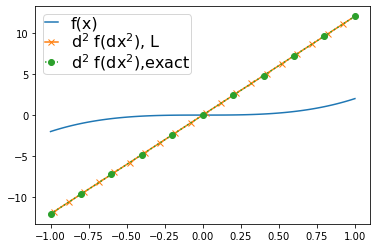

In [17]:

plt.plot(myvals,inp,label='f(x)')
plt.plot(myvals[1:-1],outp,marker='x',markevery=5,label=r'd$^2$ f(dx$^2$), L')
plt.plot(myvals,d2exact,linestyle = ':',label=r'd$^2$ f(dx$^2$),exact',markevery=10, marker="o")
legend = plt.legend(loc='upper left', shadow=False,fontsize=16,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)
plt.show()

# Task 1

Compute and plot the first and second derivative of the above one-dimensional functions using your method of choice in the value range from -4 to 4 using an appropriate grid spacing.

# Task 2

Compute and plot the partial first derivatives of the above two-dimensional functions using autograd in the value range from -4 to 4 using an appropriate grid spacing. 

# Task 3
Construct and plot the second derivative of function1, $d^2f_1/dx^2$, through the Laplacian matrix in the value range from -4 to 4 using an appropriate grid spacing.